<a href="https://colab.research.google.com/github/LuisHiram99/trabajos_PLN/blob/main/Tareas/Tarea%2003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Tarea 3</h1>

<h3>Modelo para clasificación binaria usando unigramas y bigramas</h3>

Presentar un módelo de Machine Learning que prediga a cual de las dos clases pertenece un texto. La clase 0 es *hoteles*, la clase 1 es *noticias*.

Tareas a realizar:

1. Separar el dataset en *train*/*test* en alguna proporción de tu elección, cuida conservar la distribución de los datos.
2. Aplicar una estrategia de tu elección de preprocesamiento y limpieza del texto.
3. Diseña un modelo para predecir la etiqueta basado en conteos de 1-gramas y/o 2-gramas. Puedes usar cualquiera de las estrategias presentadas en clase:
 * Variar el hiperparámetro $k$ de número de 1-gramas/2-gramas más frecuentes.
 * Eliminar palabras en las intersecciones de ambas listas.
 * Si un elemento aparece en ambas listas, conservar el de mayor frecuencia.
 * Usar las frecuencias como pesos para los conteos.
 * ¿Qué hacer con los casos donde no hay una conclusión clara?<br>

 Puedes usar otra estrategia que consideres adecuada, con la única restricción de que debe basarse en las frecuencias de 1-gramas/2-gramas.
4. Usar la métrica `accuracy` en el conjunto de prueba para medir el rendimiento de tu modelo.
5. Encapsular todo el modelo en una función que realice la inferencia: debe recibir el texto y regresar la etiqueta 0/1.

**Ten cuidado con el data leakage**

En la presentación hay que describir todos los puntos anteriores.


# Dataset

In [1]:
!gdown 14cbj9FEc4YePGJg17LbjVSP42x6P960U

Downloading...
From: https://drive.google.com/uc?id=14cbj9FEc4YePGJg17LbjVSP42x6P960U
To: /content/two_categories_dataset.csv
100% 88.1M/88.1M [00:01<00:00, 69.7MB/s]


In [2]:
import pandas as pd

df = pd.read_csv('/content/two_categories_dataset.csv',index_col=0)
df.head()

,text,tag
0,el ministerio español de ciencia e innovación ...,1
1,nos vamos profundamente emocionados de la hosp...,1
2,"Lugar muy acogedor, tranquilo, menú a buen pre...",0
3,"varios miembros del gobierno, entre ellos, el ...",1
4,"Buena ubicación, a 15 minutos andando del cent...",0


In [3]:
df.shape

(36344, 2)

In [4]:
df["tag"].value_counts()

,count
tag,
1,18172
0,18172


In [5]:
#viendo valores nulos
df.isnull().sum()

,0
text,0
tag,0


# Tareas

1. Separar el dataset en *train*/*test* en alguna proporción de tu elección, cuida conservar la distribución de los datos.

In [6]:
from sklearn.model_selection import train_test_split
x = df['text']
y = df['tag']

train,test = train_test_split(df, test_size=0.2, random_state=42, stratify=y)

In [7]:
print(train['tag'].value_counts())
print(test['tag'].value_counts())

tag
1    14538
0    14537
Name: count, dtype: int64
tag
0    3635
1    3634
Name: count, dtype: int64


2. Aplicar una estrategia de tu elección de preprocesamiento y limpieza del texto.

In [8]:
train.head()

,text,tag
11208,Sé que es llamado un hostal pero en España que...,0
23962,el instructor de la causa del ‘procés’ indepen...,1
10395,"""la legislatura durará cuatro años, porque es ...",1
30609,entre clase y clase en la facultad de ciencias...,1
19136,el libro los años del hambre. historia y memo...,1


In [16]:
#importando spacy y nlkt para quitar signos de puntuacion
import spacy
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [21]:
df_clean = train.copy()
df_tag0 = df_clean[df_clean['tag']==0]
df_tag1 = df_clean[df_clean['tag']==1]

In [24]:
print(df_tag0['tag'].value_counts())
print(df_tag1['tag'].value_counts())

tag
0    14537
Name: count, dtype: int64
tag
1    14538
Name: count, dtype: int64


In [27]:
df_tag0 = df_tag0.reset_index(drop=True)
df_tag1 = df_tag1.reset_index(drop=True)

In [56]:
stop_words = set(stopwords.words('spanish'))
stop_words.add("si")
def get_all_text(df):
  list_of_tokens = []
  for i in range(0,df["text"].size):
    texto = df["text"][i]
    words = [t.lower() for t in nltk.word_tokenize(texto) if t.isalpha() and t.lower() not in stop_words]
    list_of_tokens.extend(words)
  return Counter(list_of_tokens)

In [57]:
most_common_words = get_all_text(df_tag0)

In [58]:
most_common_words.most_common(20)

[('hotel', 11310),
 ('habitación', 6598),
 ('bien', 5968),
 ('personal', 4824),
 ('habitaciones', 4333),
 ('desayuno', 3656),
 ('centro', 3032),
 ('buena', 2975),
 ('ubicación', 2810),
 ('baño', 2713),
 ('precio', 2244),
 ('cerca', 2152),
 ('recepción', 2052),
 ('amable', 2046),
 ('noche', 2035),
 ('limpio', 2027),
 ('excelente', 2014),
 ('cama', 2001),
 ('dos', 1998),
 ('trato', 1974)]

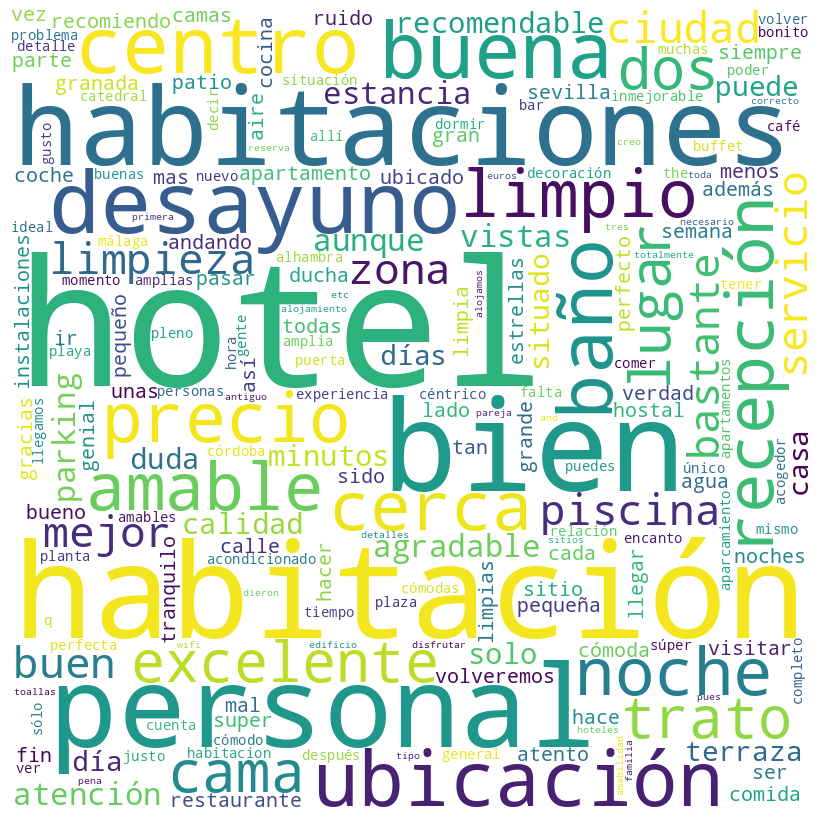

In [59]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Generate the word cloud from word frequencies
wordcloud = WordCloud(
    width=800,
    height=800,
    background_color='white',
    min_font_size=10
).generate_from_frequencies(most_common_words)

# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.tight_layout(pad=0)
plt.show()